# Gradient Descent

## First Part - Necessary Code

In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors

In [2]:
# Import company colors
with open('plot_colors.json', 'r') as pc:
    color_dict = json.load(pc)

c_light, c_dark, c_blue = color_dict['color_light'], color_dict['color_dark'], color_dict['color_blue']

# Define color map for plotting
#color_map = ListedColormap([c_blue, c_light, c_dark])
green = "#03AC13"

### Generate Data

In [3]:
def generate_data(num_points):
    np.random.seed(42)
    x = np.random.uniform(low=0, high=60, size=num_points)
    noise = np.random.normal(loc=0, scale=0.38, size=num_points)
    y = 0.2 + 0.05 * x + noise
    X = np.column_stack((np.ones(num_points), x))
    X_df = pd.DataFrame(X, columns=['intercept', 'Days of bootcamp'])
    X_df['Coffee consumption in [l]'] = y
    return X_df, X, y.reshape(-1, 1)

num_points=50
data, X, y = generate_data(num_points)

In [4]:
def generate_data_contour_plots(num_points):
    np.random.seed(42)
    x = np.random.uniform(low=-5, high=5, size=num_points)
    noise = np.random.normal(loc=0, scale=1.0, size=num_points)
    y = 2 + 4 * x + noise
    return x, y

# Generate data points with more noise
num_points = 100
x_cont, y_cont = generate_data_contour_plots(num_points)
# Add a column of ones for the bias term
X_cont = np.column_stack((np.ones(num_points), x_cont))

In [5]:
def generate_data_multifeatures(num_points):
    np.random.seed(42)
    noise = np.random.normal(loc=0, scale=0.0002, size=num_points)
    #x_1 = np.random.uniform(low=0, high=1, size=num_points)
    #x_2 = np.random.uniform(low=0, high=1, size=num_points)
    x_1 = np.random.normal(loc=0, scale=1, size=num_points)
    x_2 = np.random.normal(loc=0, scale=1, size=num_points)
    X = np.concatenate((x_1.reshape(-1,1), x_2.reshape(-1,1)), axis=1)
    
    y = np.add(np.add(4 * x_1 , 4 * x_2), noise)
    return X, y

# Generate data points with more noise
num_points = 100
X_scaled, y_showcase_scaling = generate_data_multifeatures(num_points)
# Add a column of ones for the bias term
X_scaled = np.column_stack((np.ones(num_points), X_scaled))
X_unscaled = X_scaled.copy()
X_unscaled[:,1] = X_unscaled[:,1]*0.4

### Plot Data wit regression line and residuals

In [6]:
# Plot the data points
def plot_data(data, color=c_blue, color_line=c_light, figsize=(10,6), regression=True, residuals=False, second_line=False, color_line_second=c_dark, safe=False, fig_name="plot_data"):
    data_plot = data.copy()
    plt.figure(figsize=figsize)
    sns.set_context("talk", font_scale=0.8, rc={"lines.linewidth": 2.})
    plt.scatter(data_plot['Days of bootcamp'], data_plot['Coffee consumption in [l]'], c=color, s=30, zorder=3)
    
    # Add regression line
    if regression:
        b1, b0 = np.polyfit(data_plot['Days of bootcamp'], data_plot['Coffee consumption in [l]'], 1)
        data_plot['Regression line'] = b0 + b1*data_plot['Days of bootcamp']
        plt.plot(data_plot['Days of bootcamp'],  data_plot['Regression line'], c=color_line, zorder=2)
        if residuals:
            for index, row in data_plot.iterrows():
                plt.plot([row['Days of bootcamp'], row['Days of bootcamp']], [row['Coffee consumption in [l]'], row['Regression line']], color=c_dark, linewidth=1, zorder=1)
        if second_line:
            #b1, b0 = np.polyfit(data_plot['Days of bootcamp'], data_plot['Coffee consumption in [l]'], 1)
            data_plot['Regression line'] = b0 + 0.5 + 0.65*b1*data_plot['Days of bootcamp']
            plt.plot(data_plot['Days of bootcamp'],  data_plot['Regression line'], c=color_line_second, zorder=2)
            
    
    plt.xlabel('Day of bootcamp')
    plt.ylabel('Coffee consumption [l]')
    sns.despine()
    if safe:
        plt.savefig("../images/gradient_descent/plots/" + fig_name + ".png")

### Result of closed form solution (OLS model)

In [7]:
def closed_form_solution(X, y):
    model = LinearRegression()
    model.fit(X, y)
    coefficients = model.coef_
    intercept = model.intercept_
    print(f"Using OLS (normal equation), the best parameters were found at: \n\
            b₀ = {intercept[0].round(3)} \n\
            b₁ = {coefficients[0][0].round(3)}")

### Intro Plot

In [8]:
# Function 
def f(x):
    return (x-4)**2

# Derivative (gradient) of function f(x)
def f_derivative(x):
    return 2 * x - 8

# Calculate tangent line
def calculate_tangent(x_point):
    tangent_slope = f_derivative(x_point)
    tangent_intercept = f(x_point) - tangent_slope * x_point
    return tangent_slope, tangent_intercept

# Gradient Descent
def gradient_descent_of_function(learning_rate, num_iterations, initial_b, function, derivative):
    b = initial_b  # Initial guess

    # Lists to store the values for plotting
    b_values = [b]
    y_values = [function(b)]

    for _ in range(num_iterations):
        gradient = derivative(b)  
        b -= learning_rate * gradient

        # Append values for plotting
        b_values.append(b)
        y_values.append(function(b))

    return b_values, y_values


def gradient_descent_intro_plot(learning_rate, num_iterations, initial_b=0.6, function=f, derivative=f_derivative, y_label=False, tangent=False, round_arrow=True, title=None, figsize=(10,6), ax=None):

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        plt.sca(ax)
    
    # Generate x values for plotting the function
    x = np.linspace(-1, 9, 100)
    y = f(x)
    
    # Perform gradient descent
    b_values, y_values = gradient_descent_of_function(learning_rate, num_iterations, initial_b, function, derivative)
    
    # Plot the function
    ax.plot(x, y, color=c_blue, label='f(x) = x^2', zorder=1)

    # Plot the gradient descent steps
    ax.scatter(b_values, y_values, color=c_light, label='Gradient Descent Steps', zorder=3)

    # Set labels and title
    ax.set_xlabel(r'$b_1$')
    ax.set_ylim(-0.5, 27)
    
    if y_label:
        ax.set_ylabel(r'$J(b_1)$')
    
    # Add vertical line and text at the start point
    ax.vlines(x=initial_b, ymin=-1, ymax=f(initial_b), color=c_dark, linestyle='--', label='Start Point')
    ax.text(initial_b, -0.025, 'Start', ha='center', va='center', transform=ax.get_xaxis_transform())
    # xticks need to be longer to display "Start" text better
    ax.tick_params(axis='x', length=10)

    # Add curved arrows to indicate the direction of movement
    for i in range(1, len(b_values)):
        start_point = (b_values[i-1], y_values[i-1])
        end_point = (b_values[i], y_values[i])
        if round_arrow:
            arrow = patches.FancyArrowPatch(start_point, end_point, arrowstyle='->', color=c_light, mutation_scale=10, connectionstyle="arc3,rad=.9")
        else:
            arrow = patches.FancyArrowPatch(start_point, end_point, arrowstyle='->', color=c_light, mutation_scale=10)
        ax.add_patch(arrow)

    if title:
        ax.set_title(title)
    
    if tangent:
        # Add tangent line
        #for i in range(0, len(b_values)):
        b_point = b_values[-1]
        tangent_slope, tangent_intercept = calculate_tangent(b_point)
        b_tangent = np.linspace(b_point - 1, b_point + 1, 100)
        ax.plot(b_tangent, tangent_slope*b_tangent+tangent_intercept, color=green, label='Tangent at x={}'.format(b_point), zorder=2)
        
    # Add a legend
    #plt.legend()

### Plateau and local minimum

In [9]:
# Define function with plateau and local minimum
def g(x):
    return 0.000025*(x-2)*(x-4)**(2)*(x-12)**(5)+5

# Define derivative
def g_derivative(x):
    return 0.0002*x**7 - 0.01225*x**6 + 0.3108*x**5 - 4.204*x**4 + 32.448*x**3 - 141.3504*x**2 + 317.952*x - 282.0096

def plot_plateau(figsize=(10,5)):
    x = np.linspace(0, 16, 300) 
    
    b, y = gradient_descent_of_function(0.005, 20, 1.9, g, g_derivative)
    b_plateau, y_plateau = gradient_descent_of_function(0.05, 30, 14.5, g, g_derivative)
    
    plt.figure(figsize=figsize)
    sns.set_context("talk", font_scale=0.8, rc={"lines.linewidth": 2.})
    plt.plot(x, g(x), color=c_dark)
    plt.scatter(b, y, color=c_light)
    plt.scatter(b_plateau, y_plateau, color=c_light)
    
    plt.ylim(0,10)
    plt.xticks([])
    plt.xlabel(r"$b$")
    plt.ylabel(r"$J(b)$")
    plt.yticks([])
    sns.despine()

### 3D plot

In [10]:
# Define the cost function
def d(x_1, x_2):
    return 0.005 * (x_1 - 1) * (x_1 - 4) * (x_1 - 7) * (x_1 + 1) * (x_1 - 3) * (x_1 - 5) * (x_1 - 8.2) + 7 - \
          0.005 * (x_2 - 1) * (x_2 - 4) * (x_2 - 7) * (x_2 + 1) * (x_2 - 3) * (x_2 - 5) * (x_2 - 8.2) + 7

# Partial derivative
def partial_derivative_d_of_x_2(x_2):
    return -(35*x_2**6 - 816*x_2**5 + 7145*x_2**4 - 28720*x_2**3 + 49845*x_2**2 - 19808*x_2 - 18049) / 1000

# Define the function
def partial_derivative_d_of_x_1(x_1):
    return (35*x_1**6 - 816*x_1**5 + 7145*x_1**4 - 28720*x_1**3 + 49845*x_1**2 - 19808*x_1 - 18049) / 1000

def gradient_descent_of_function_2_features(learning_rate, num_iterations, initial_b_1, initial_b_2, function=d, derivative_x_1=partial_derivative_d_of_x_1, derivative_x_2=partial_derivative_d_of_x_2):
    b_1 = initial_b_1
    b_2 = initial_b_2

    # Lists to store the values for plotting
    b_1_values = [b_1]
    b_2_values = [b_2]
    cost_values = [function(b_1, b_2)]

    for _ in range(num_iterations):
        gradient_x_1 = derivative_x_1(b_1)
        gradient_x_2 = derivative_x_2(b_2)
        
        b_1 -= learning_rate * gradient_x_1
        b_2 -= learning_rate * gradient_x_2

        # Append values for plotting
        b_1_values.append(b_1)
        b_2_values.append(b_2)
        cost_values.append(function(b_1, b_2))

    return b_1_values, b_2_values, cost_values

def three_d_plot(gd_1, gd_2, safe, fig_name):
    # Generate x1 and x2 values for the cost function
    x_1_surf = np.linspace(3, 8.2, 1000)
    x_2_surf = np.linspace(3, 8.2, 1000)
    X_1_surf, X_2_surf = np.meshgrid(x_1_surf,x_2_surf)
    
    # calculate cost
    cost_surf = d(X_1_surf, X_2_surf) 

    # Create the figure and axis
    fig = plt.figure(figsize=(6.5,6))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the cost function
    ax.plot_surface(X_1_surf, X_2_surf, cost_surf, cmap='viridis',zorder=1)

    # Plot the gradient descent lines
    ax.plot(*gd_1, marker='o', linestyle='-', color=c_light, zorder=4,markersize=2)
    ax.plot(*gd_2, marker='o', linestyle='-', color=c_light, zorder=4,markersize=2)

    # Set labels and title
    ax.set_xlabel(r"$b_0$")
    ax.set_ylabel(r"$b_1$")
    ax.set_zlabel(r"$J(b_0,b_1)$")
    ax.set_title('Gradient Descent')
    ax.set_zlim(0, 20)
    # TODO: still fix the z-axis label
    #for spine in ax.spines.values():
    #    spine.set_visible(False)
    plt.tight_layout()
    #fig.subplots_adjust(left=-5.51)
    # Show the plot
    plt.show()
    if safe:
        fig.savefig("../images/gradient_descent/plots/" + fig_name + ".png")

def gradient_descent_3d_plot(safe=False, fig_name="gd_3D"):
    gd_1 = gradient_descent_of_function_2_features(learning_rate=0.01, num_iterations=30, initial_b_1= 6.6, initial_b_2=6.6)
    gd_2 = gradient_descent_of_function_2_features(learning_rate=0.03, num_iterations=50, initial_b_1= 3.5, initial_b_2=7)
    three_d_plot(gd_1 = gd_1, gd_2 = gd_2,safe=safe, fig_name=fig_name)
        


### Gradient descent variants

In [11]:
def cost_function(X, y, bs):
    n = len(y)
    predictions = np.dot(X, bs)
    error = predictions - y
    cost = np.sum(error**2) / (2 * n)
    return cost

def gradient_descent(X, y, learning_rate, num_iterations=1000):
    num_samples, num_features = X.shape
    bs = np.random.rand(num_features)  # Initialize theta with small random values

    bs_history = []
    cost_history = []

    for _ in range(num_iterations):
        # Compute predictions
        y_pred = np.dot(X, bs)
        # Compute gradients
        gradients = np.dot(X.T, (y_pred - y)) / num_samples
        # Update theta
        bs -= learning_rate * gradients
        # Compute cost
        cost = cost_function(X, y, bs)
        cost_history.append(cost)
        # Append theta to history
        bs_history.append(bs.copy())

    return bs, bs_history, cost_history

def stochastic_gradient_descent(X, y, learning_rate, num_epochs=100):
    num_samples, num_features = X.shape
    bs = np.random.rand(num_features)  # Initialize theta with small random values

    bs_history = []
    cost_history = []

    for _ in range(num_epochs):
        for i in range(num_samples):
            # Randomly select a sample
            random_idx = np.random.randint(num_samples)
            X_i = X[random_idx]
            y_i = y[random_idx]

            # Compute prediction and error
            prediction = np.dot(X_i, bs)
            error = prediction - y_i

            # Compute gradient and update theta
            gradient = np.dot(X_i.T, error)
            bs -= learning_rate * gradient

            # Compute cost after each epoch
            cost = cost_function(X, y, bs)
            cost_history.append(cost)

            # Append theta to history
            bs_history.append(bs.copy())

    return bs, bs_history, cost_history

def minibatch_gradient_descent(X, y, learning_rate, num_epochs=100, batch_size=2):
    num_samples, num_features = X.shape
    bs = np.random.rand(num_features)  # Initialize theta with small random values

    bs_history = []
    cost_history = []

    for _ in range(num_epochs):
        # Shuffle the data
        indices = np.random.permutation(num_samples)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, num_samples, batch_size):
            # Select a mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute predictions and errors for the mini-batch
            predictions = np.dot(X_batch, bs)
            errors = predictions - y_batch

            # Compute gradient and update theta
            gradient = np.dot(X_batch.T, errors) / batch_size
            bs -= learning_rate * gradient

        # Compute cost after each epoch
            cost = cost_function(X, y, bs)
            cost_history.append(cost)

        # Append theta to history
            bs_history.append(bs.copy())

    return bs, bs_history, cost_history



### Contour Plots

In [12]:
def contour_plot(X,y, ax):
    # Plot contour plot of the cost function
    b0_vals = np.linspace(-2, 5, 200)
    b1_vals = np.linspace(0, 7, 200)
    cost_vals = np.zeros((len(b0_vals), len(b1_vals)))
    for i, b0 in enumerate(b0_vals):
        for j, b1 in enumerate(b1_vals):
            bs = np.array([b0, b1])
            cost_vals[j, i] = cost_function(X, y, bs)
    ax.set_xlabel('$b_0$')
    ax.set_ylabel('$b_1$')
    ax.set_xlim(-2,5)
    ax.set_ylim(0,7)
    #plt.figure(figsize=(8, 6))
    # Define levels for the contour plot
    levels = np.logspace(np.log10(np.min(cost_vals)), np.log10(80), num=12)
    # Define the colors for the custom colormap
    custom_grey_1 = (235/255, 235/255, 235/255, 1)  # RGB: #EBEBEB, Alpha: 1 (fully opaque)
    custom_grey_2 = (118/255, 118/255, 118/255, 1)
    black = (0, 0, 0, 1)
    colors = [(0.0, custom_grey_1), (0.5, custom_grey_2), (1.0, black)]

    # Create the custom colormap using LinearSegmentedColormap
    cmap_name = 'custom_gray'
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    # Create the contour plot
    contour_pt = ax.contourf(b0_vals, b1_vals, cost_vals, levels=levels, cmap=cmap)
    ax.scatter(2, 4, marker='*', color='grey', s=100, label='Optimal')
    ax.legend()

    return contour_pt


def gradient_descent_variant_contour_plot(gd_algorithm, X, y,learning_rate, figsize=(8, 6), axis=None, fig=None):
    if axis is None:
        fig, axis = plt.subplots(figsize=figsize)
    contour_pt = contour_plot(X,y,ax=axis)
    _, bs_history, _ = gd_algorithm(X, y, learning_rate,)
    selected_bs = np.array(bs_history[:600])
    axis.plot(selected_bs[:, 0], selected_bs[:, 1],color=c_light, markersize= 3)

    if gd_algorithm == gradient_descent:
        axis.set_title('Batch Gradient Descent')
    elif gd_algorithm == stochastic_gradient_descent:
        axis.set_title('Stochastic Gradient Descent')
    elif gd_algorithm == minibatch_gradient_descent:
        axis.set_title('Mini-batch Gradient Descent')
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})
    sns.despine()
    
    return contour_pt, fig, axis



### Comparison

In [13]:
def contour_plot_scaling(X,y, ax):
    # Plot contour plot of the cost function

    b0_vals = np.full(shape=500, fill_value=0)
    b1_vals = np.linspace(-15, 35, 500)
    b2_vals = np.linspace(-15, 35, 500)
    cost_vals = np.zeros((len(b1_vals), len(b2_vals)))

    for i, theta1 in enumerate(b1_vals):
        for j, theta2 in enumerate(b2_vals):
            theta = np.array([0, theta1, theta2])
            cost_vals[j, i] = cost_function(X, y, theta)
    ax.set_xlabel('$b_1$')
    ax.set_ylabel('$b_2$')

    # Define levels for the contour plot
    levels = np.logspace(np.log10(np.min(cost_vals)), np.log10(200), num=18)
    # Define the colors for the custom colormap
    custom_grey_1 = (235/255, 235/255, 235/255, 1)  # RGB: #EBEBEB, Alpha: 1 (fully opaque)
    custom_grey_2 = (118/255, 118/255, 118/255, 1)
    black = (0, 0, 0, 1)
    colors = [(0.0, custom_grey_1), (0.5, custom_grey_2), (1.0, black)]

    # Create the custom colormap using LinearSegmentedColormap
    cmap_name = 'custom_gray'
    cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors)
    # Create the contour plot
    contour_pt = ax.contourf(b1_vals, b2_vals, cost_vals, levels=levels, cmap=cmap)

    return contour_pt

def gradient_descent_scaling_plot(X, y,learning_rate, scaling=False, figsize=(8, 6), axis=None, fig=None):
    if axis is None:
        fig, axis = plt.subplots(figsize=figsize)
    contour_pt = contour_plot_scaling(X,y,ax=axis)
    _, bs_history, _ = gradient_descent(X, y, learning_rate,)
    selected_bs = np.array(bs_history[:50:8])
    axis.plot(selected_bs[:, 1], selected_bs[:, 2],color=c_light, markersize= 10, marker='.')
    if scaling:
        axis.set_title('Scaled Data')
        axis.set_xlim(-10,20)
        axis.set_ylim(-10,20)
        axis.scatter(4, 4, marker='*', color='grey', s=100, label='Optimal')
    else:
        axis.set_title('Unscaled Data')
        axis.set_xlim(-15,35)
        axis.set_ylim(-15,30)
        axis.scatter(4*10/4, 4, marker='*', color='grey', s=100, label='Optimal')
    axis.legend()
    sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.})
    sns.despine()
    return contour_pt, fig, axis



In [14]:
def calc_cost(b, X, y):
    n = len(X)
    predictions = X.dot(b)
    cost = 1/(2*n) * np.sum(np.square(predictions-y))
    return cost


def batch_gradient_descent_2(X, y, learning_rate=0.1, n_iterations=250):
    n = len(X)
    # Define random starting values for b0 and b1
    np.random.seed(42)
    b = np.random.randn(2,1)
    
    b_path_bgd = []
    cost_history_bgd = []
    
    for iteration in range(n_iterations):
        gradients = 2/n * X.T.dot(X.dot(b) - y)
        b = b - learning_rate * gradients
        b_path_bgd.append(b)
        cost_history_bgd.append(calc_cost(b, X, y))
        
    return np.array(b_path_bgd), cost_history_bgd


def stochastic_gradient_descent_2(X, y, n_epochs=15, learning_rate=0.01):
    n = len(X)
    # Define random starting values for b0 and b1
    np.random.seed(42)
    b = np.random.randn(2,1)
    
    b_path_sgd = []
    cost_history_sgd = []

    for epoch in range(n_epochs):
        cost = 0
        for i in range(n):
            random_index = np.random.randint(n)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(b) - yi)
            b = b - learning_rate * gradients
            b_path_sgd.append(b)
            cost_history_sgd.append(calc_cost(b, X, y))
            
    return np.array(b_path_sgd), cost_history_sgd


def mini_batch_gradient_descent_2(X, y, minibatch_size=20, n_iterations=50, learning_rate=0.1):
    n = len(X)
    # Define random starting values for b0 and b1
    np.random.seed(42)
    b = np.random.randn(2,1)
    
    b_path_mgd = []
    cost_history_mgd = []
    
    for epoch in range(n_iterations):
        cost = 0
        shuffled_indices = np.random.permutation(n)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, n, minibatch_size):
            xi = X_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(b) - yi)
            b = b - learning_rate * gradients
            b_path_mgd.append(b)
            cost_history_mgd.append(calc_cost(b, X, y)) 
            
    return np.array(b_path_mgd), cost_history_mgd


def plot_comparison(b_path_sgd, b_path_mgd, b_path_bgd, figsize=(10,6), colors=[c_light, c_blue, c_dark], ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        plt.sca(ax)
    
    sns.set_context("talk", font_scale=0.8, rc={"lines.linewidth": 2.})
    
    plt.plot(b_path_sgd[:, 0], b_path_sgd[:, 1], "-+", c=colors[0], linewidth=1, label="Stochastic")
    plt.plot(b_path_mgd[:, 0], b_path_mgd[:, 1], "-s", c=colors[1], linewidth=2, label="Mini-batch")
    plt.plot(b_path_bgd[:, 0], b_path_bgd[:, 1], "-o", c=colors[2], linewidth=3, label="Batch")
    
    plt.xlabel(r"$b_0$")
    plt.ylabel(r"$b_1$")
    plt.legend(loc="lower left", fontsize=16)
    #plt.ylim(-0.2, 0.1)
    sns.despine()
    
    
def plot_cost(cost_path, label, color=c_light, figsize=(10, 6), xlim=100, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        plt.sca(ax)
        
    ax.plot(range(0, len(cost_path)), cost_path, color=color, label=label)
    ax.set_xlabel(r"$Iteration$")
    ax.set_ylabel(r'J($b_0$, $b_1$)')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, xlim)
    plt.legend(loc="upper right", fontsize=10)
    sns.despine()

In [15]:
b_path_bgd, cost_history_bgd = batch_gradient_descent_2(X, y, learning_rate=0.0001)
b_path_sgd, cost_history_sgd = stochastic_gradient_descent_2(X, y, learning_rate=0.0001)
b_path_mgd, cost_history_mgd = mini_batch_gradient_descent_2(X, y, learning_rate=0.0001)

### Save plots as image

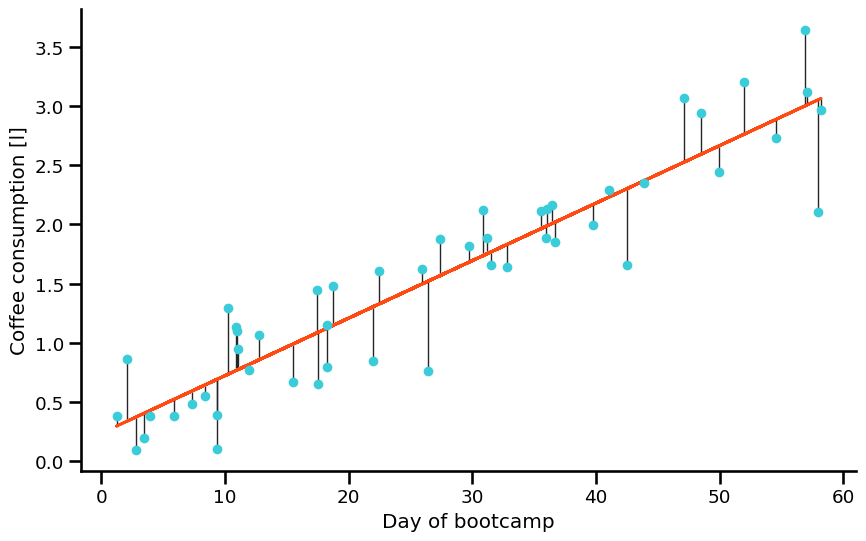

In [16]:
plot_data(data, residuals=True, safe=True, fig_name="linear_regression")

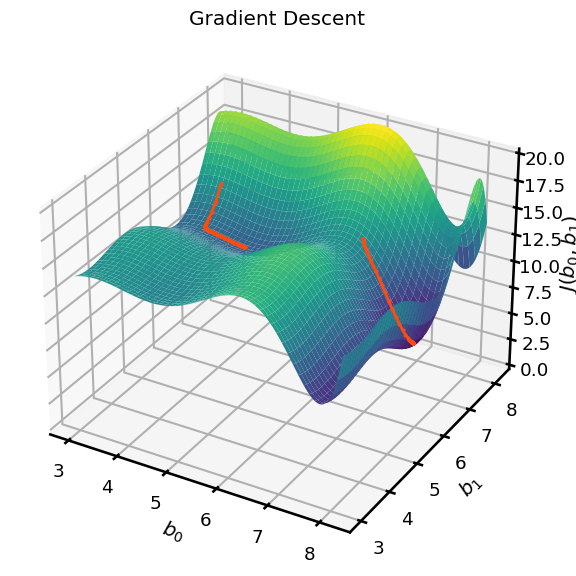

In [17]:
gradient_descent_3d_plot(safe=True)

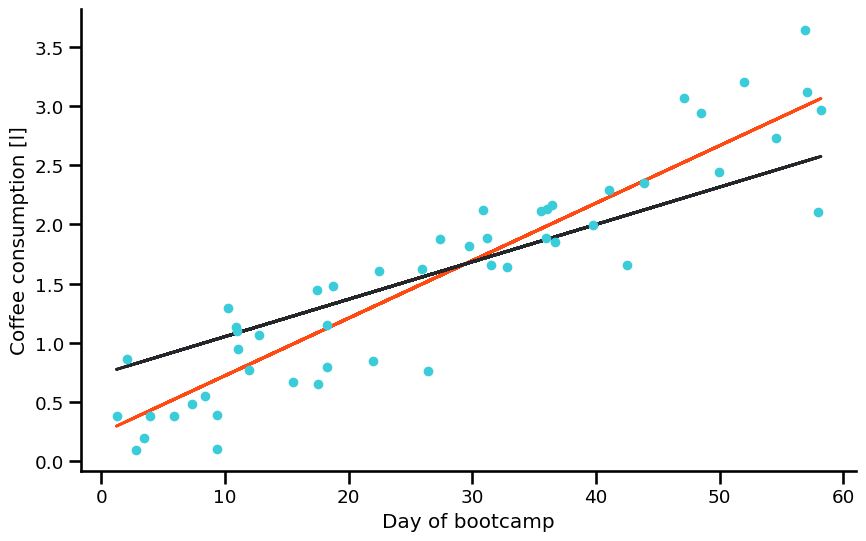

In [18]:
plot_data(data, second_line=True, safe=True, fig_name="linear_regression_two_lines")

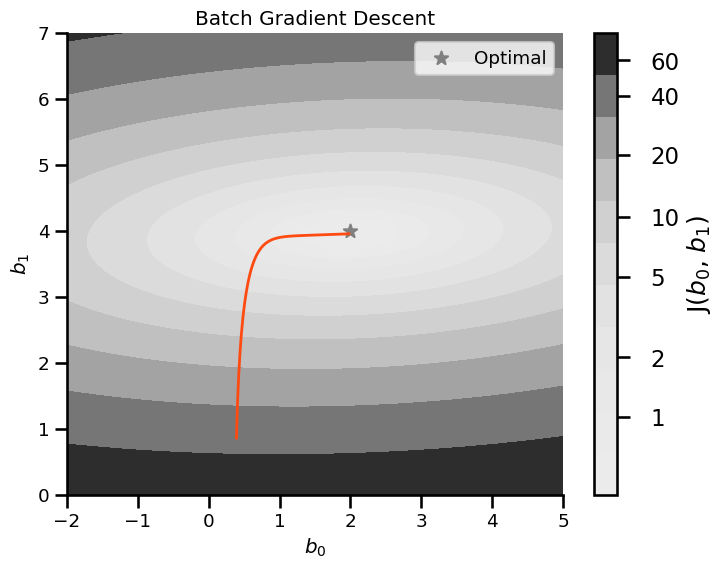

In [19]:
contour_pt, fig, ax =gradient_descent_variant_contour_plot(gd_algorithm=gradient_descent, X=X_cont, y=y_cont,learning_rate=0.01)
cbar = fig.colorbar(label=r'J($b_0$, $b_1$)', ticks=[60, 40, 20, 10, 5,2,1], mappable=contour_pt,  ax=ax)
cbar.ax.yaxis.set_tick_params(pad=15)
fig.savefig("../images/gradient_descent/plots/batch_gd.png")

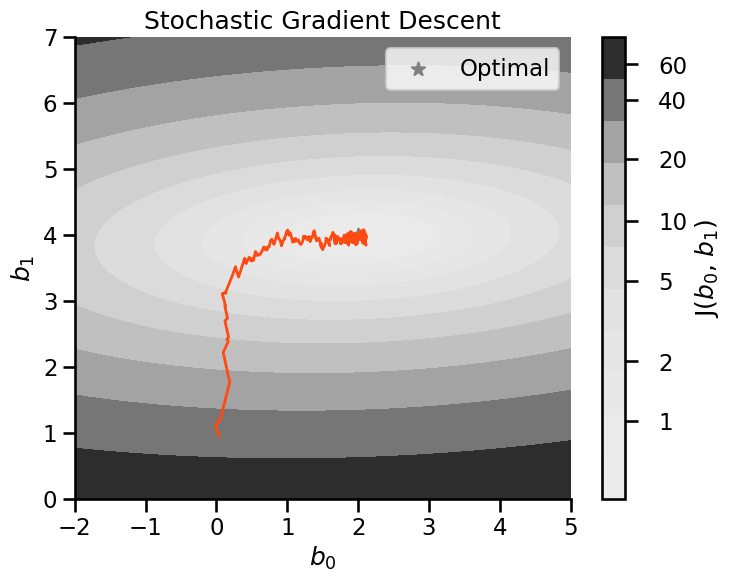

In [20]:
contour_pt, fig, ax =gradient_descent_variant_contour_plot(gd_algorithm=stochastic_gradient_descent, X=X_cont, y=y_cont,learning_rate=0.01)
cbar = fig.colorbar(label=r'J($b_0$, $b_1$)', ticks=[60, 40, 20, 10, 5,2,1], mappable=contour_pt,  ax=ax)
cbar.ax.yaxis.set_tick_params(pad=15)
fig.savefig("../images/gradient_descent/plots/stochastic_gd.png")

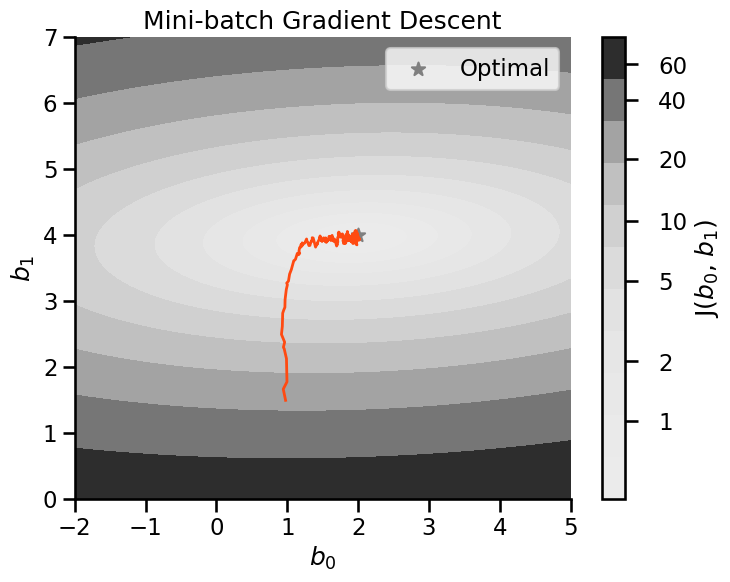

In [21]:
contour_pt, fig, ax = gradient_descent_variant_contour_plot(gd_algorithm=minibatch_gradient_descent, X=X_cont, y=y_cont,learning_rate=0.01,)
cbar = fig.colorbar(label=r'J($b_0$, $b_1$)', ticks=[60, 40, 20, 10, 5,2,1], mappable=contour_pt,  ax=ax)
cbar.ax.yaxis.set_tick_params(pad=15)
fig.savefig("../images/gradient_descent/plots/minibatch_gd.png")

## Second Part - Lecture

<div class="slide-title"> 
    
# Gradient Descent
    
</div>

## Orientation

<div class="group">
    <div class="text">
        
Where is Gradient Descent used in the Data Science Lifecycle?
<br><br>
        
**06 PREDICTIVE MODELING:**
- select a ML algorithm
- **train the ML model**
- evaluate the performance
- make predictions
        
    </div>
    <div class="images">
        <img src="../images/gradient_descent/img_p1_1.png" width=750>
    </div>
</div>


## Recap of Optimization of Linear Regression with OLS

<div class="group">
    <div class="images_70">
        <img src="../images/gradient_descent/plots/linear_regression.png" width="5000">       
    </div>
    <div class="text_30">

<br><br>     
Model: $y=b_{0}+b_{1}\cdot x+e$
<br>
        
Residuals: $e_{i}=y_{i}-\hat{y}_{i}$
<br>
              
OLS: <br>
Minimize the sum of squared residuals <br><br>
$\sum_{i=1}^{n}e_{i}^{2}$
<br><br>

results in Normal Equation: <br><br>
$b=\left(X^{T}X\right)^{-1}X^{T}y$

→ closed form solution        
    </div>
</div>

In [22]:
closed_form_solution(X[:,1].reshape(-1,1), y)

Using OLS (normal equation), the best parameters were found at: 
            b₀ = 0.237 
            b₁ = 0.049


Notes: we modeled the relationship between y and x residual results from the actual y minus our prediction Normal Equation slow: to many number of features (x) (double feature → take 5 to 8 times longer) training data set to big correlation of features to strong -> X gets singular only valid for linear problems

## Definition
Gradient Descent is an **iterative optimization algorithm** to find the minimum of a function.

→ e.g. of a cost function


<div class="alert alert-block alert-info">
<b>Note:</b> 
Unlike the normal equation, Gradient Descent has no closed solution.
</div>

Notes: first proposed around 1847 Unlike the normal equation, GD has no closed solution. It is a numerical algorithm, which means it tries to find an approximate solution of our problem rather than an exact one.

<img src="../images/gradient_descent/foggy_mountain.png">

### Find the parameters of a model by gradually minimizing your cost

<div class="group">
    <div class="text">
        
Go downhill in the direction of the steepest slope.

→ endpoint is dependent on the initial starting point
    </div>
    <div class="images">
        <img src="../images/gradient_descent/plots/gd_3D.png" width="900">
    </div>
</div>

Notes: Gradient descent basically consists of taking small steps in the direction of the gradient, that is the direction of the steepest descent.

## Gradient Descent in a nutshell

<div class="group">
    <div class="text">

* Have some function $J(b)$
* Want min $J(b)$:
    * start with some random parameter $b$
    * keep changing $b$ to reduce $J(b)$ until we hopefully get to a minimum
        
    </div>
    <div class="images">
        <img src="../images/gradient_descent/gradient_descent_sketch_transparent_bg.png" width=800>
    </div>
</div>

## When to use Gradient Descent?

* GD is a simple **optimization procedure** that can be used for many machine learning algorithms (eg. linear regression, logistic regression, SVM)
<br><br>
* used for **“Backpropagation”** in Neural Nets (variations of GD)
<br><br>
* can be used for **online learning** (update as soon as new data comes in)
<br><br>
* gives **faster results** for problems with many features (computationally simpler)



Notes:  
Time complexity of GD: O(knd) meaning linear in number of iterations, number of observations, number of features  
Time complexity of solving the normal equation: O(n^3)

### First Step: Define Model

<div class="group">
    <div class=text>
        
<br>
Example:<br>
least squares with one feature
<br><br><br>

        
<span style="font-size:50px">
    
$$\hat{y}=b_0+b_1\cdot x$$

</span>     
    </div>
    <div class=images>
        <img src="../images/gradient_descent/plots/linear_regression_two_lines.png">
    </div>
</div>
    


### Second Step: Define Cost Function

**Mean Squared Error** with a little bit of cosmetics (2 in denominator)
<br><br>

$$ J(b_{0},b_{1})\;=\;\frac{1}{2n}\sum_{i=1}^{n}{(\hat{y}_{i}-y_{i})}^{2}\,$$

$\hspace{0.5cm}$

$$min(J(b_{0},b_{1}))$$

Notes: The cosmetics is the “2” in the denominator of the fraction. It serves no mathematical purpose and will just not have an impact on the minima of the coefficients as it is multiplicative (again, this comes from the representation chosen by NG)

### Third Step: Initialize Gradient Descent

Deliberately set random starting values for $b$

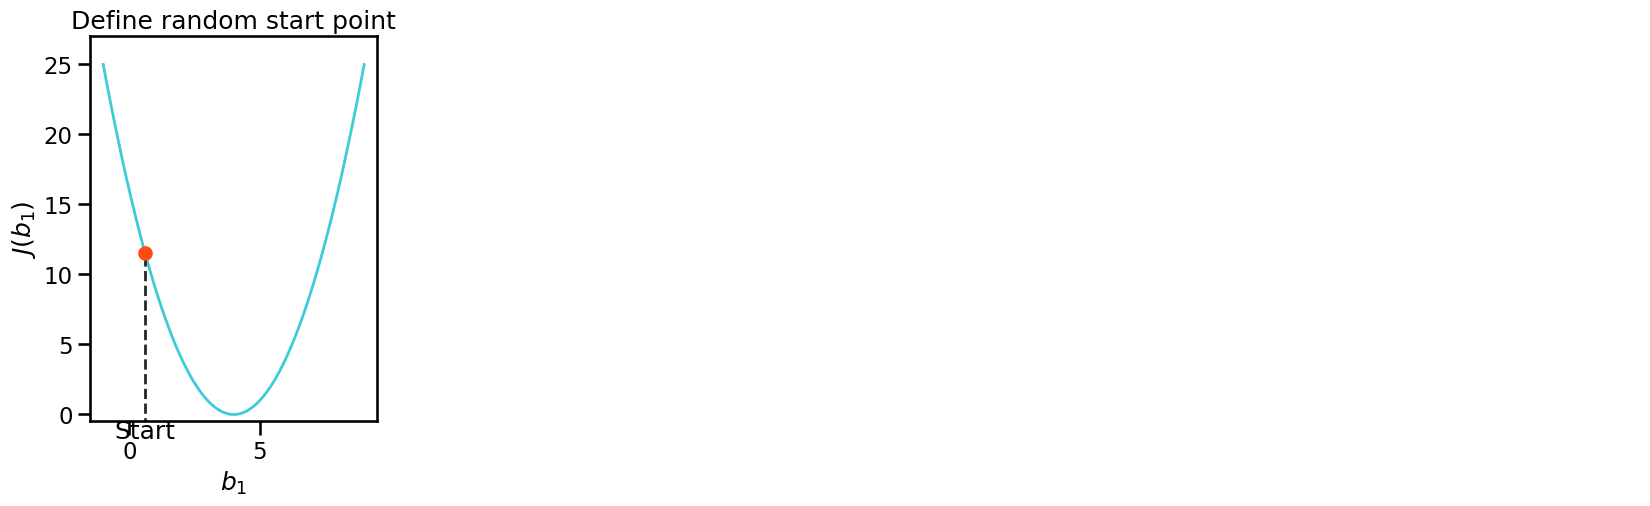

In [23]:
fig, ax = plt.subplots(1, 5, figsize=(20,5))
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=0, tangent=False, ax=ax[0], title="Define random start point", y_label=True)
ax[1].axis('off')
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
plt.subplots_adjust(wspace=0.1);

Notes: In which direction do we have to move to decrease our cost?

### Forth Step: Derivatives with respect to the parameters

<br><br>

$$ J(b_{0},b_{1})\,=\,\frac{1}{2n}\sum_{i=1}^{n}\left(\hat{y}_{i}-y_{i}\right)^{2}\,=\,\frac{1}{2n}\sum_{i=1}^{n}\left(b_{0}+b_{1}x_{i}-y_{i}\right)^{2}$$

<br>


The <span class="color-brand">**chain rule**</span> gives us:

$$\begin{align}
\frac{\partial J}{\partial b_{0}}&=\frac{1}{n}\sum_{i=1}^{n}(b_{0}+b_{1}x_{i}-y_{i})\cdot 1 \\\\
\frac{\partial J}{\partial b_{1}}&=\frac{1}{n}\sum_{i=1}^{n}(b_{0}+b_{1}x_{i}-y_{i})\cdot x_{i}
\end{align}$$

Notes: the derivative with respect to b0, gradient vector combines partial derivatives  
Mention that the derivatives can also be calculated numerically with the difference quotient. However, if available, using the closed form values is more accurate and thus faster.

### Forth Step: Gradient Descent

<div class="group">
    <div class="text">

Start descent:
* Take **derivatives** with respect to your parameters $b$
* Set your learning rate (step-size)
* Adjust your parameters (step)
        
    </div>
    <div class="images">

$$\text{slope of }b_1\text{ at start point }=-6.8$$
</div>
</div>


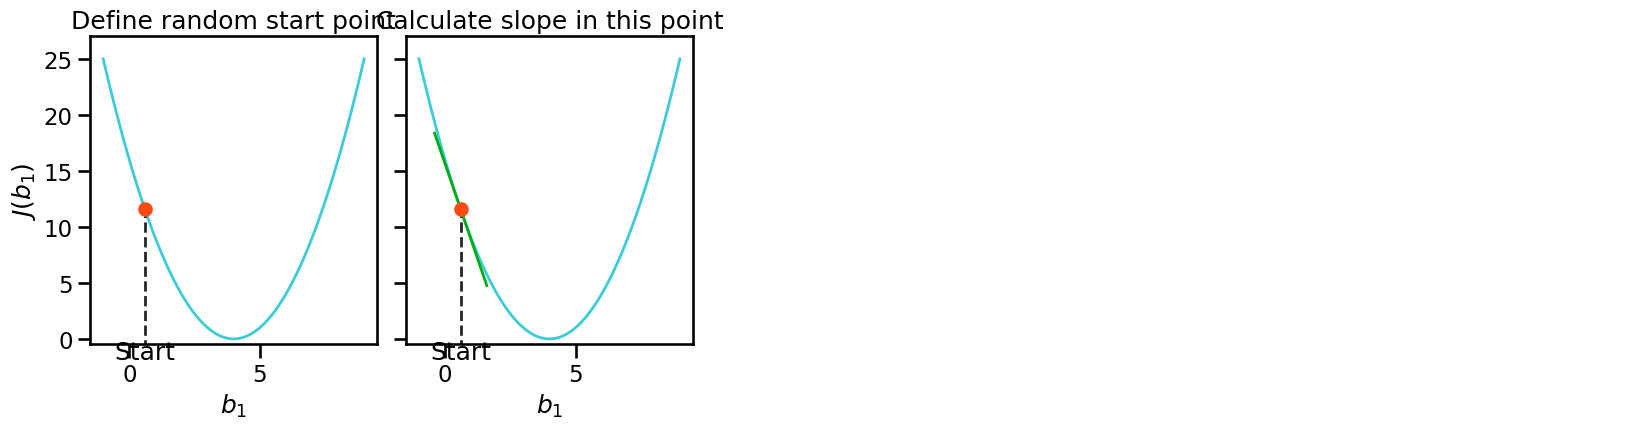

In [24]:
fig, ax = plt.subplots(1, 5, figsize=(20,4), sharey=True)
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=0, tangent=False, ax=ax[0], title="Define random start point", y_label=True)
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=0, tangent=True, ax=ax[1], title="Calculate slope in this point")
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
plt.subplots_adjust(wspace=0.1);

Notes: The derivative is a concept from calculus and refers to the slope of the function at a given point.

### Forth Step: Gradient Descent

<div class="group">
    <div class="text">

Start descent:
* Take derivatives with respect to your parameters $b$
* Set your **learning rate** (step-size)
* Adjust your parameters (step)
        
    </div>
    <div class="images">

$$\begin{align}
\alpha&=0.15 \\
slope&=-6.8
\end{align}$$
</div>
</div>


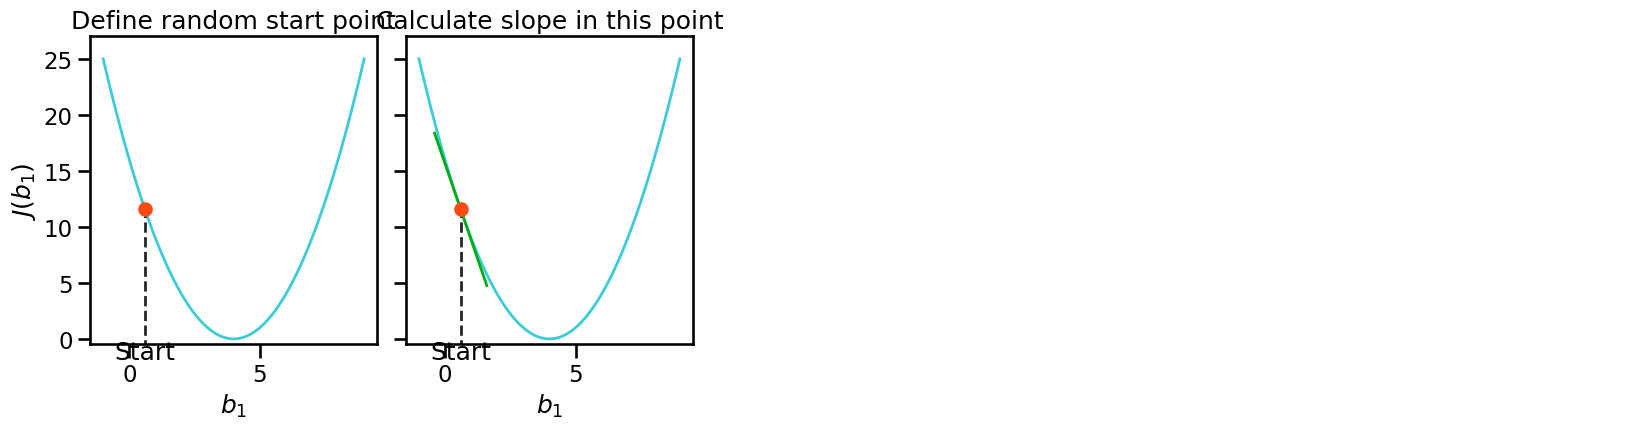

In [25]:
fig, ax = plt.subplots(1, 5, figsize=(20,4), sharey=True)
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=0, tangent=False, ax=ax[0], title="Define random start point", y_label=True)
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=0, tangent=True, ax=ax[1], title="Calculate slope in this point")
ax[2].axis('off')
ax[3].axis('off')
ax[4].axis('off')
plt.subplots_adjust(wspace=0.1);

### Forth Step: Gradient Descent

<div class="group">
    <div class="text">

Start descent:
* Take derivatives with respect to parameters $b$
* Set your learning rate (step-size)
* **Adjust your parameters** (step)
        
    </div>
    <div class="images">

$$\begin{align}
step&=\alpha \cdot slope \\
b_{1}^{new}&=b_{1}^{old} - step \\
b_{1}^{new}&=0.6-(0.15*(-6.8)) \\
b_{1}^{new}&=1.62 \\
\end{align}$$
</div>
</div>

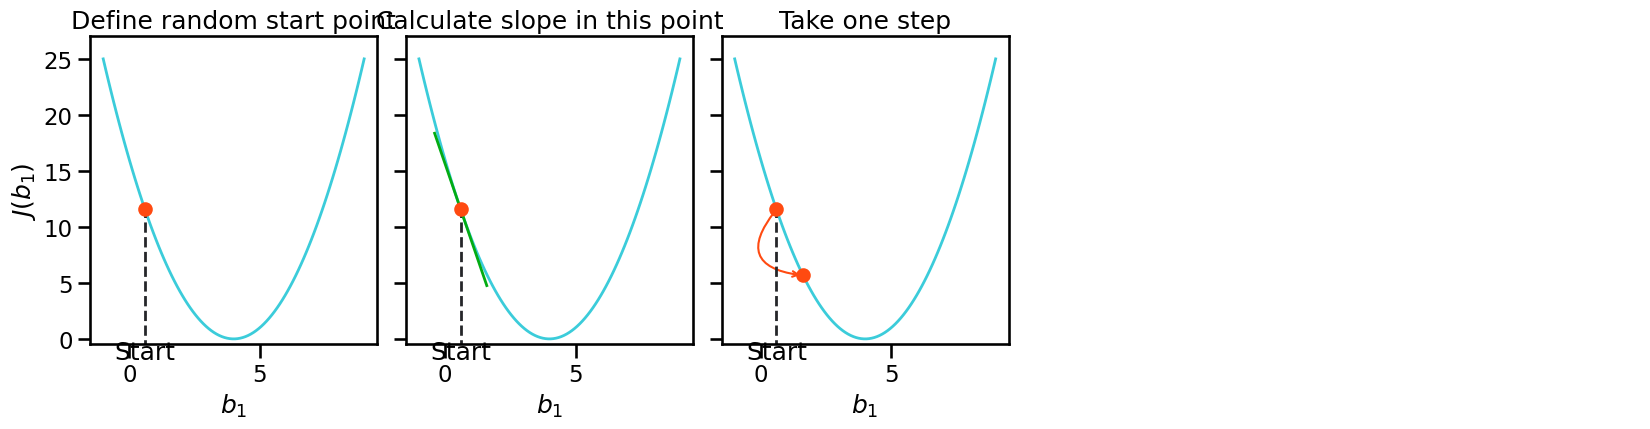

In [26]:
fig, ax = plt.subplots(1, 5, figsize=(20,4), sharey=True)
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=0, tangent=False, ax=ax[0], title="Define random start point", y_label=True)
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=0, tangent=True, ax=ax[1], title="Calculate slope in this point")
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=1, tangent=False, ax=ax[2], title="Take one step")
ax[3].axis('off')
ax[4].axis('off')
plt.subplots_adjust(wspace=0.1);

### Forth Step: Gradient Descent

<div class="group">
    <div class="text">
        
Start descent:
- Take derivatives with respect to your parameters $b$
- Set your learning rate (step-size)
- Adjust your parameters (step)
        
**Repeat till there is no further improvement**        
    </div>
    <div class="images">

$$\begin{align}
step&=\alpha \cdot slope \\
b_{1}^{new}&=b_{1}^{old} - step
\end{align}$$

</div>
</div>

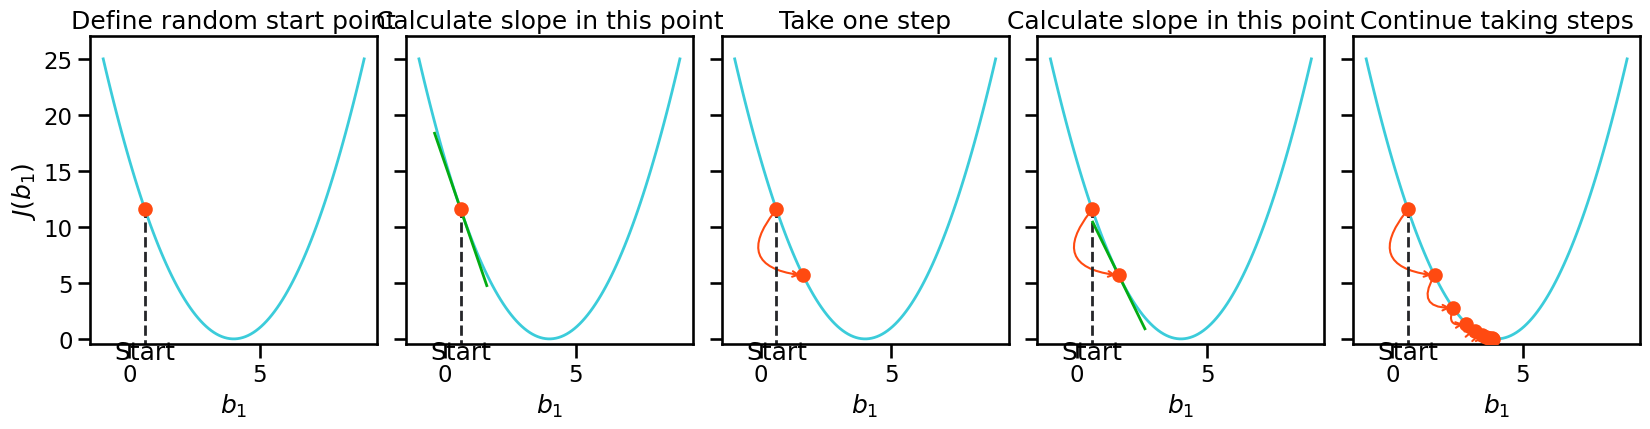

In [27]:
fig, ax = plt.subplots(1, 5, figsize=(20,4), sharey=True)
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=0, tangent=False, ax=ax[0], title="Define random start point", y_label=True)
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=0, tangent=True, ax=ax[1], title="Calculate slope in this point")
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=1, tangent=False, ax=ax[2], title="Take one step")
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=1, tangent=True, ax=ax[3], title="Calculate slope in this point")
gradient_descent_intro_plot(learning_rate=0.15, num_iterations=9, tangent=False, ax=ax[4], title="Continue taking steps")
plt.subplots_adjust(wspace=0.1)

Notes: Why is there no further improvement at the end?

### Gradient Descent summed up

<div class="group">
    <div class="text">

$\hspace{0.5cm}$
1. Define model
2. Define the cost function
3. Deliberately set some starting values
4. Start descent:
    - Take derivatives with respect to parameters
    - Set your learning rate (step-size)
    - Adjust your parameters (step)
5. Repeat 4. till there is no further improvement

    </div>
    <div class="images">
        <img src="https://suniljangirblog.files.wordpress.com/2018/12/1-1.gif?w=600&zoom=2" width=1000>
    </div>
</div>


<div class="slide-chapter">
    
## BREAK
    
</div>

## Learning Rate
It is important to find a good value for the learning rate!
<br><br><br><br>

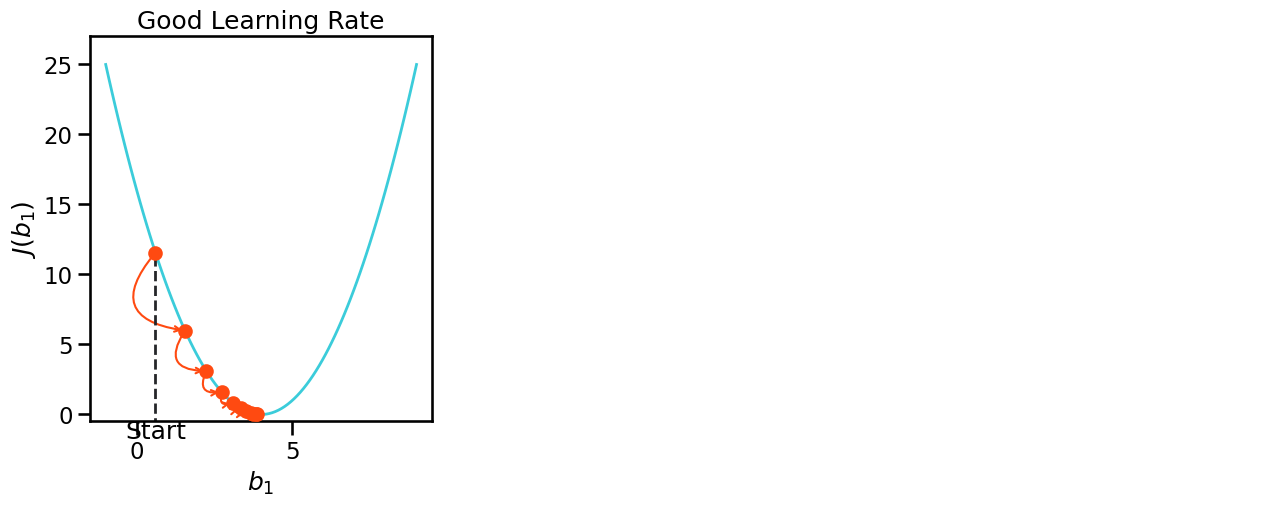

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey=True)
gradient_descent_intro_plot(learning_rate= 0.14, num_iterations=10, title = "Good Learning Rate",ax=ax[0], y_label=True)
ax[1].axis('off')
ax[2].axis('off');

### Learning Rate

It is important to find a good value for the learning rate!

Learning Rate **too small**
→ will take long to find optimum

Learning Rate **too large**
→ not able to find optimum

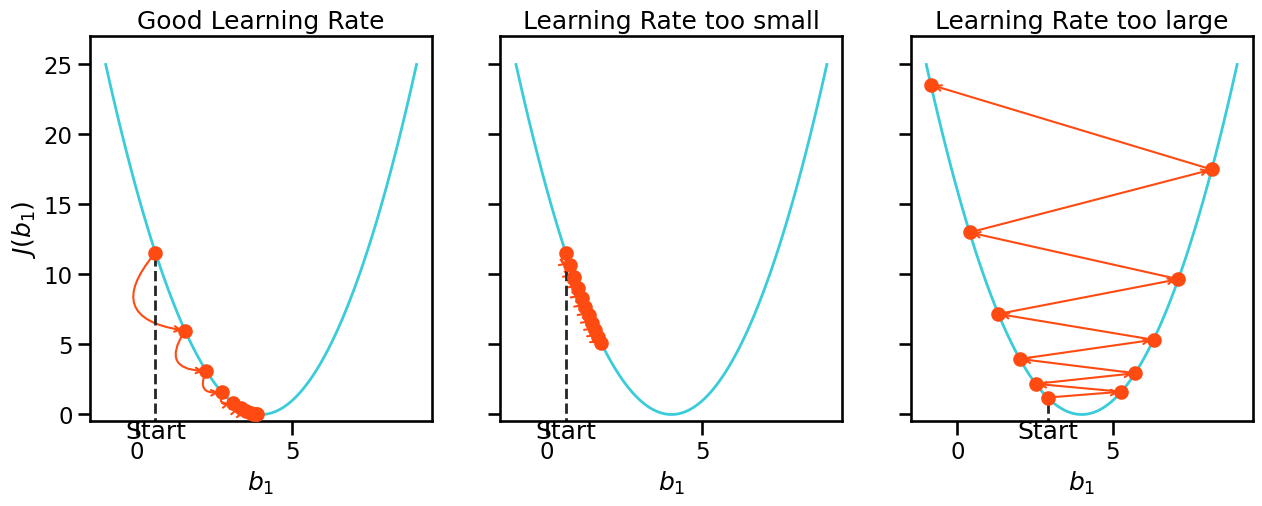

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey=True)
gradient_descent_intro_plot(learning_rate= 0.14, num_iterations=10, title = "Good Learning Rate",ax=ax[0], y_label=True)
gradient_descent_intro_plot(learning_rate= 0.02, num_iterations=10,title = "Learning Rate too small", ax=ax[1])
gradient_descent_intro_plot(learning_rate= 1.08, num_iterations=10, initial_b= 2.9, title = "Learning Rate too large",round_arrow=False,ax=ax[2])

## Two main challenges of Gradient Descent
The MSE cost function for linear regression is a convex function, it just has one global minimum.
This is not always the case. Problems are:
* local minima
* plateaus

Convex: If you pick two random points the line that is connecting them will
not cross the curve.

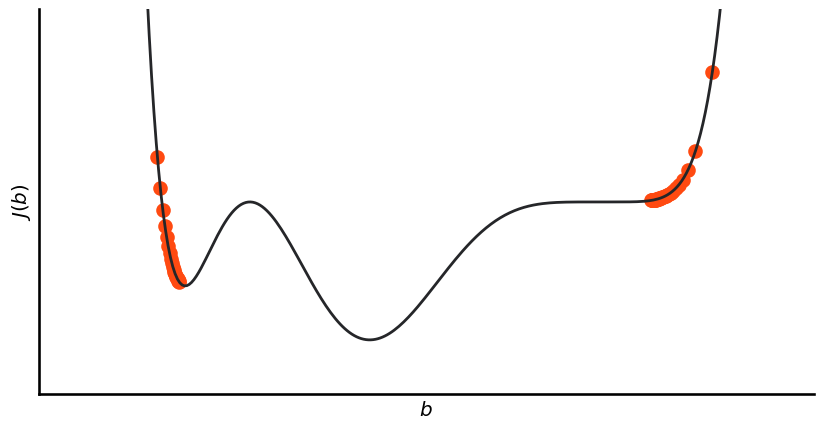

In [30]:
plot_plateau()

Notes: convex cost functions: e.g. lineare/logistic reg., SVM,

### Unscaled Data

Without scaling the algorithm Gradient Descent needs more time to find the minimum


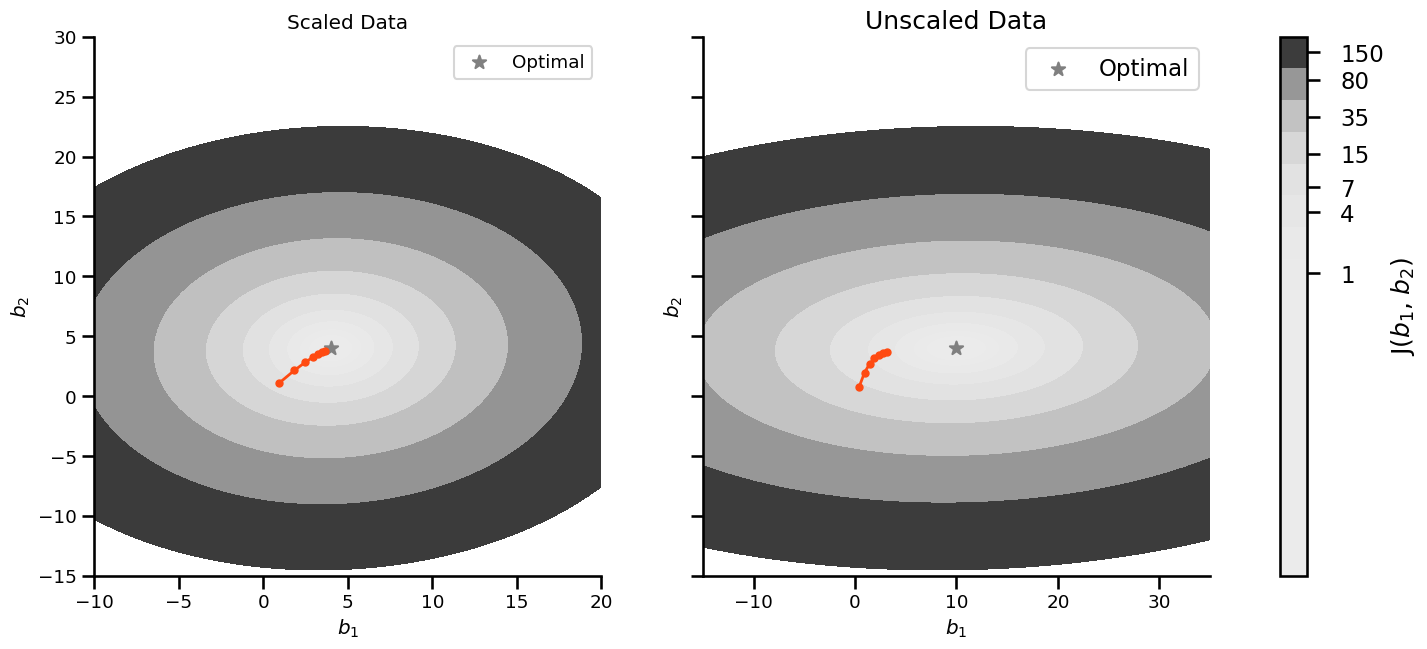

In [31]:
fig, ax = plt.subplots(1,2,figsize= (18,7),sharey=True)
contour_pt, _, _ =gradient_descent_scaling_plot(X=X_scaled, y=y_showcase_scaling,scaling=True, learning_rate=0.05,axis=ax[0], fig=fig)
contour_pt, _, _ =gradient_descent_scaling_plot(X=X_unscaled, y=y_showcase_scaling,scaling=False, learning_rate=0.05,axis=ax[1], fig=fig)
cbar = fig.colorbar(label=r'J($b_1$, $b_2$)', ticks=[150, 80, 35, 15, 7,4,1], mappable=contour_pt,  ax=ax.ravel().tolist())
cbar.ax.yaxis.set_tick_params(pad=15)

Notes: distorted, stretches the relationship between b1 and b2 smaller scale for b2 → larger scale for feature x2 and vice versa

## Variants of Gradient Descent

**Which route to take downhill?**

<img src="../images/gradient_descent/hill.png" width="1500">

### Batch gradient descent

<div class="group">
    <div class="text">
        
**All instances** are used to calculate the gradient (step). <br><br>
The algorithm is faster than the Normal Equation but still **slow**.      
    </div>
    <div class="images">
        <img src="../images/gradient_descent/plots/batch_gd.png">
    </div>
</div>

### Stochastic gradient descent

<div class="group">
    <div class="text">
        
**Only 1 random instances** is used to calculate the gradient (step).

**Much faster** as there is little data to process at each update.

Can be used for **very large data sets
→ online training possible**

Cost decreases only on average and **bounces back and forth**.
→ can help not getting stuck in local minima

**Optimum will be close but never reached.**     
    </div>
    <div class="images">
        <img src="../images/gradient_descent/plots/stochastic_gd.png">
    </div>
</div>

### Mini-Batch gradient descent

<div class="group">
    <div class="text">
        
Trains on **small random subset** instead of all data or individual ones.

**Performs better than SGD** as it exploits hardware optimization of matrix operations

**Drawback**: It is harder not to end up in **local minima**  
    </div>
    <div class="images">
        <img src="../images/gradient_descent/plots/minibatch_gd.png">
    </div>
</div>

### Gradient Descent Comparison

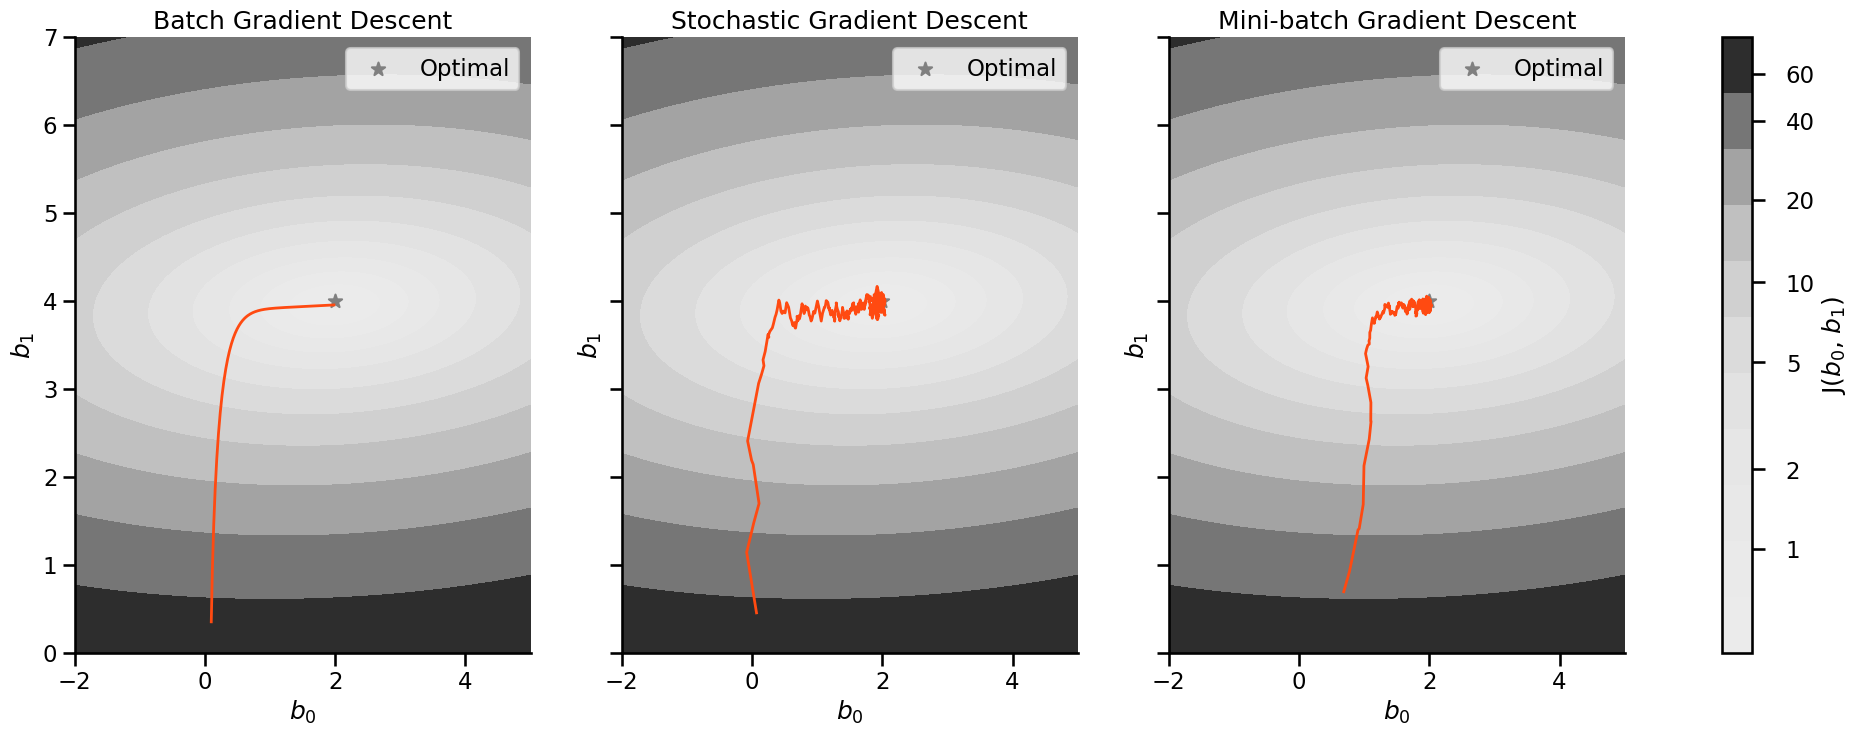

In [32]:
fig, ax = plt.subplots(1,3,figsize= (25,8),sharey=True)
cont, _, _ = gradient_descent_variant_contour_plot(gd_algorithm=gradient_descent, X=X_cont, y=y_cont,learning_rate=0.01, axis=ax[0], fig=fig)
cont, _, _ = gradient_descent_variant_contour_plot(gd_algorithm=stochastic_gradient_descent, X=X_cont, y=y_cont,learning_rate=0.01, axis=ax[1], fig=fig)
cont, _, _ = gradient_descent_variant_contour_plot(gd_algorithm=minibatch_gradient_descent, X=X_cont, y=y_cont,learning_rate=0.01, axis=ax[2], fig=fig)
cbar = fig.colorbar(label=r'J($b_0$, $b_1$)', ticks=[60, 40, 20, 10, 5,2,1], mappable=cont,  ax=ax.ravel().tolist())
cbar.ax.yaxis.set_tick_params(pad=15)

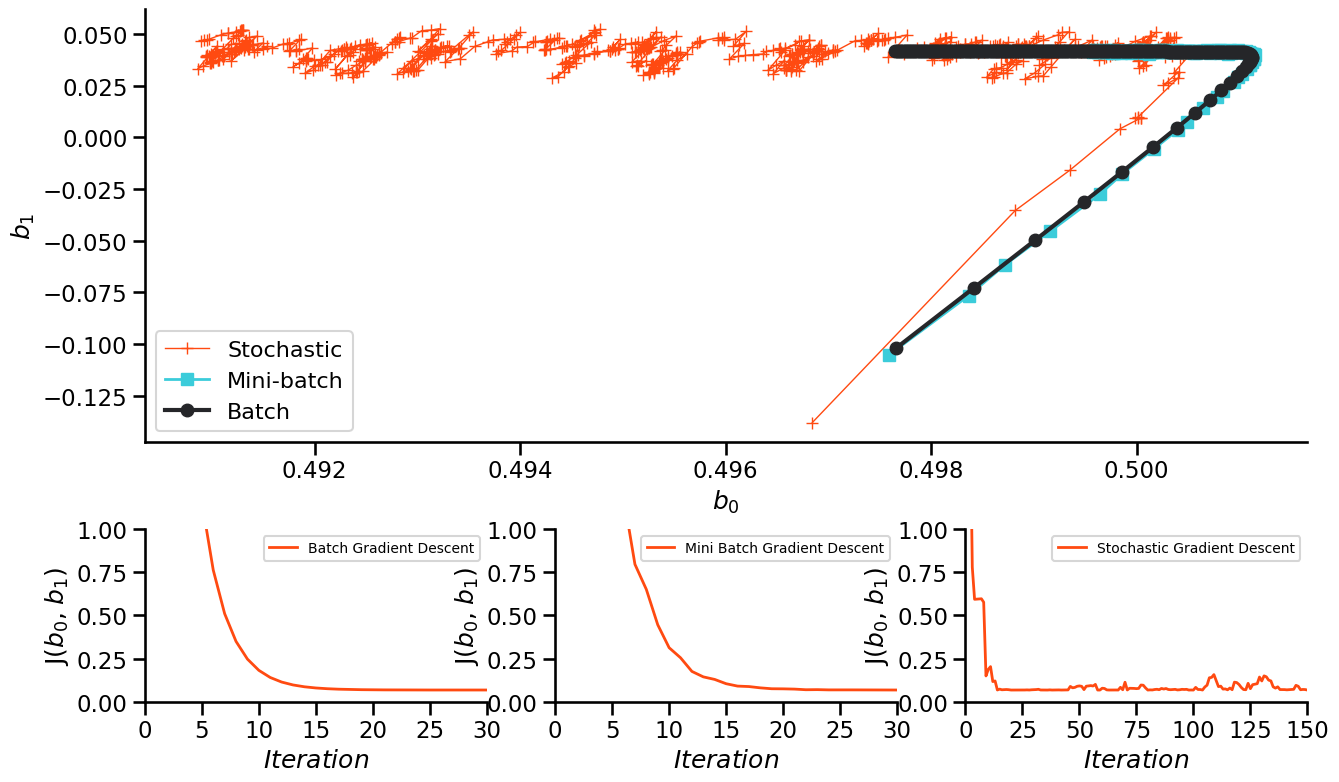

In [33]:
fig, ax = plt.subplot_mosaic("AAA;AAA;BCD", figsize=(15,9))
plot_comparison(b_path_sgd, b_path_mgd, b_path_bgd, ax=ax['A'])
plot_cost(cost_history_bgd, "Batch Gradient Descent", xlim=30, ax=ax["B"])
plot_cost(cost_history_mgd, "Mini Batch Gradient Descent", xlim=30, ax=ax["C"])
plot_cost(cost_history_sgd, "Stochastic Gradient Descent", xlim=150,  ax=ax["D"])
plt.subplots_adjust(hspace=0.5)

## References

[Gradient Descent Step by Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)




